In [239]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

In [240]:
pet_data = pd.read_csv("./all/train.csv", sep=",")

In [235]:
pet_data = pd.read_csv("./all/train.csv", sep=",")
breed_labels = pd.read_csv('./all/breed_labels.csv')
state_labels = pd.read_csv('./all/state_labels.csv')
color_labels = pd.read_csv('./all/color_labels.csv')

readable_pet_data = pet_data
readable_pet_data['Breed1'] = readable_pet_data['Breed1'].map(breed_labels.set_index('BreedID')['BreedName'])
readable_pet_data['Breed2'] = readable_pet_data['Breed2'].map(breed_labels.set_index('BreedID')['BreedName'])

readable_pet_data['State'] = readable_pet_data['State'].map(state_labels.set_index('StateID')['StateName'])

readable_pet_data['Color1'] = readable_pet_data['Color1'].map(color_labels.set_index('ColorID')['ColorName'])
readable_pet_data['Color2'] = readable_pet_data['Color2'].map(color_labels.set_index('ColorID')['ColorName'])
readable_pet_data['Color3'] = readable_pet_data['Color3'].map(color_labels.set_index('ColorID')['ColorName'])

genderDict = {1:'Male', 2:'Female', 3:'Mixed'}
typeDict = {1:'Dog', 2:'Cat'}
maturityDict = {1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0: 'Not Specified'}
healthDict = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}
furDict = {1: 'Short', 2: 'Medium', 3: 'Long', 0: 'Not Specified'}

readable_pet_data['Gender'] = readable_pet_data['Gender'].map(genderDict)
readable_pet_data['Type'] = readable_pet_data['Type'].map(typeDict)
readable_pet_data['MaturitySize'] = readable_pet_data['MaturitySize'].map(maturityDict)
readable_pet_data['Health'] = readable_pet_data['Health'].map(healthDict)
readable_pet_data['FurLength'] = readable_pet_data['FurLength'].map(furDict)

In [241]:
pet_data = pet_data.drop(columns = ['RescuerID', 'Name', 'Description', 'PetID'])
data = pet_data.iloc[:,:-1]
labels = pet_data['AdoptionSpeed']

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.33)

In [242]:
x_train

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
6853,2,1,266,0,2,1,6,0,1,1,2,1,2,1,1,0,41326,0,2.0
6136,2,4,264,0,3,1,3,7,2,3,2,2,2,1,3,0,41326,0,5.0
3719,2,18,266,266,2,6,0,0,2,1,1,1,1,1,1,0,41326,0,2.0
4762,2,1,266,265,2,6,0,0,2,2,1,1,2,1,1,0,41326,0,4.0
817,2,3,265,0,1,4,5,7,2,2,3,1,3,1,1,0,41401,0,1.0
2122,2,36,266,0,1,2,7,0,3,1,1,1,1,1,1,0,41326,0,5.0
11382,1,2,307,0,3,3,0,0,2,1,3,3,3,2,2,0,41401,0,1.0
608,1,24,307,0,1,2,0,0,3,1,1,1,1,1,1,200,41326,0,3.0
8768,1,0,307,0,2,2,7,0,2,1,1,1,1,1,1,0,41330,0,9.0
14693,1,84,141,0,1,1,0,0,3,1,3,3,3,1,1,0,41326,0,1.0


In [259]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X=x_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [260]:
print('Test Accuracy for Decision Trees = ' + str(clf.score(X=x_test, y=y_test)))
print('Train Accuracy for Decision Trees = ' + str(clf.score(X=x_train, y=y_train)))

Test Accuracy for Decision Trees = 0.37510105092966856
Train Accuracy for Decision Trees = 0.3909407665505226


In [261]:
clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
clf.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [262]:
print('Test Accuracy for Random Forests = ' + str(clf.score(X=x_test, y=y_test)))
print('Train Accuracy for Random Forests = ' + str(clf.score(X=x_train, y=y_train)))

Test Accuracy for Random Forests = 0.39147130153597415
Train Accuracy for Random Forests = 0.40647088103534096


In [216]:
features = data.columns

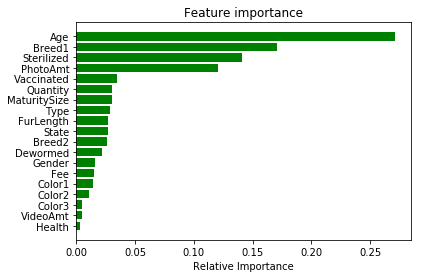

In [263]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [266]:
clf = LogisticRegression(multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.007)
clf.fit(X=x_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.007, verbose=0, warm_start=False)

In [173]:
import numpy as np

In [267]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(x_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)
score = clf.score(x_train, y_train)
print("Train score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 0.00%
Test score with L1 penalty: 0.2945
Train score with L1 penalty: 0.3025


In [209]:
clf.coef_
#Breed2, COlor3, Sterilized, VideoAmt do not have any weights

array([[ 0.00000000e+00,  0.00000000e+00, -6.97692003e-04,
         5.97871614e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.52742875e-04, -4.40144777e-05,  0.00000000e+00,
         0.00000000e+00],
       [ 8.49395039e-08, -7.10952317e-04, -1.91449794e-03,
        -4.26646499e-04,  0.00000000e+00,  2.14402583e-05,
         0.00000000e+00,  6.86490259e-06,  0.00000000e+00,
         2.12430324e-06,  3.94930191e-06,  0.00000000e+00,
         7.67351328e-06,  0.00000000e+00, -9.82398089e-06,
        -3.24448249e-04,  1.37794094e-05,  0.00000000e+00,
        -3.52208484e-05],
       [ 0.00000000e+00, -8.60126002e-04,  2.02826040e-04,
        -2.66839491e-04,  0.00000000e+00,  0.00000000e+00,
         1.26627377e-05,  6.08826316e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
import pydotplus

In [14]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [15]:
from IPython.display import Image  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [210]:
clf.fea

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
5043,2,1,266,0,1,7,0,0,2,1,2,1,2,1,1,0,41401,0,15.0
12281,1,2,307,307,2,5,0,0,2,2,2,2,2,1,1,0,41327,0,12.0
6778,1,2,307,103,2,1,2,7,2,2,1,1,1,1,1,10,41326,0,2.0
5744,1,2,307,0,1,1,2,3,2,2,2,2,1,1,1,0,41326,0,3.0
13762,2,6,266,0,2,3,5,7,2,1,1,1,1,1,1,0,41326,0,4.0
1101,1,24,109,0,2,3,0,0,2,3,1,1,1,1,1,0,41326,0,0.0
1214,1,5,307,0,2,1,0,0,2,1,1,1,1,1,1,0,41332,0,1.0
1705,2,2,266,0,1,1,4,0,2,2,2,2,3,1,1,0,41326,0,0.0
12667,1,1,307,0,3,1,2,7,2,1,2,1,2,1,4,0,41401,0,0.0
7853,1,8,307,0,2,7,0,0,2,1,1,1,1,1,1,200,41326,0,4.0
